In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/D3.csv')

In [27]:
X1 = df.values[:, 0]               # get input value from first column as Variable 1 
X2 = df.values[:, 1]               # get input value from second column as Variable 2
X3 = df.values[:, 2]               # get input value from third column as Variable 3
y = df.values[:, 3]                # get output value from fourth column

# Show only first 5 records of X1, X2, X3 and y
print('X1 = ', X1[: 5])            
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
m = len(y)
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


Text(0.5, 1.0, 'Scatter Plot of Training Data')

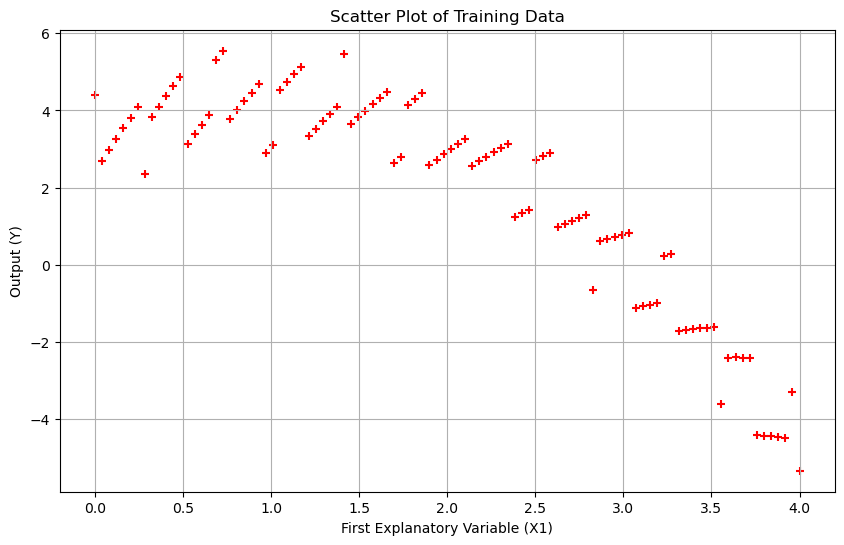

In [28]:
plt.scatter(X1,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('First Explanatory Variable (X1)')
plt.ylabel('Output (Y)')
plt.title('Scatter Plot of Training Data')

Text(0.5, 1.0, 'Scatter Plot of Training Data')

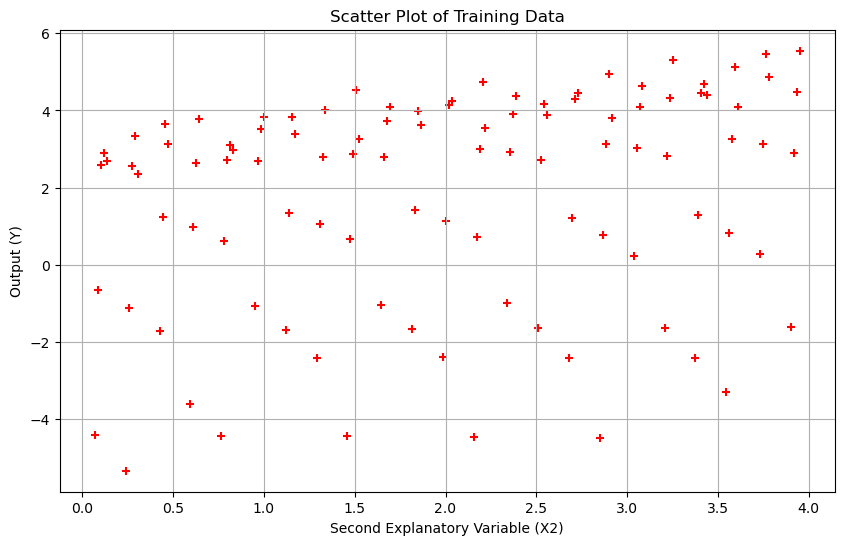

In [5]:
plt.scatter(X2,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Second Explanatory Variable (X2)')
plt.ylabel('Output (Y)')
plt.title('Scatter Plot of Training Data')

Text(0.5, 1.0, 'Scatter Plot of Training Data')

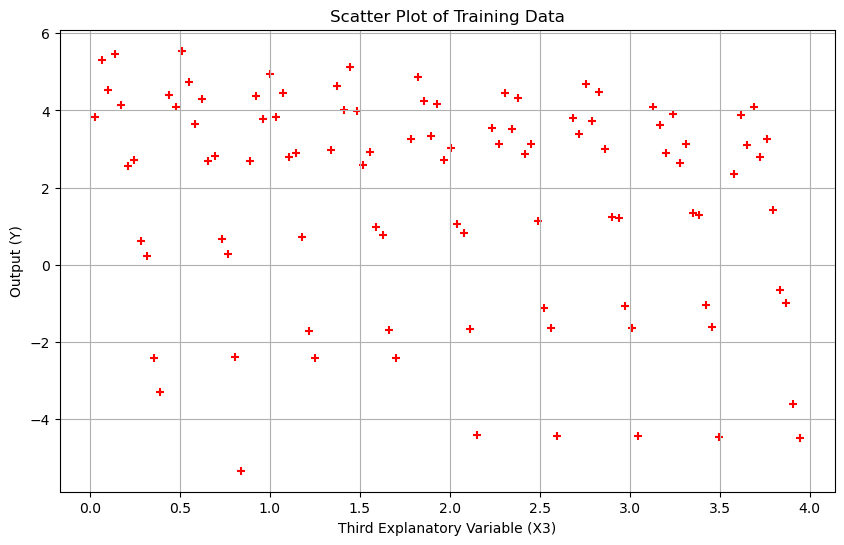

In [6]:
plt.scatter(X3,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Third Explanatory Variable (X3)')
plt.ylabel('Output (Y)')
plt.title('Scatter Plot of Training Data')

In [7]:
# Creating a matrix of single column of ones as X_0
X_0 = np.ones((m, 1))          
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
# Converting 1D arrays of X1, X2 and X3 to 2D arrays

X_1 = X1.reshape(m, 1)           
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])

X_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
X_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
X_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [9]:
# Stacking X_1, X_2, X_3 with X_0 horizotally (separately) where X_0 is the first column
# These are the final X1, X2, X3 matrices

X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])

X1 =  [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
X2 =  [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
X3 =  [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [10]:
theta = np.zeros(2)
theta

array([0., 0.])

In [11]:
# defining function for computing the cost for linear regression

def compute_cost(A, y, theta):
    predictions = A.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [12]:
cost_1 = compute_cost(X1, y, theta)
cost_2 = compute_cost(X2, y, theta)
cost_3 = compute_cost(X3, y, theta)
print('The cost for given values of theta_0 and theta_1 for Variable X1 =', cost_1)
print('The cost for given values of theta_0 and theta_1 for Variable X2 =', cost_2)
print('The cost for given values of theta_0 and theta_1 for Variable X3 =', cost_3)

The cost for given values of theta_0 and theta_1 for Variable X1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for Variable X2 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for Variable X3 = 5.524438459196242


In [13]:
# defining function for gradient descent algorithm

def gradient_descent(A, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = A.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * A.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(A, y, theta)
    
    return theta, cost_history

In [14]:
theta = [0., 0.]
iterations = 2000;
alpha = 0.1

In [15]:
# Computing final theta values and cost history for Variable X1

theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta_0 and theta_1 for Variable X1 =', theta)
print('cost_history of Variable X1 =', cost_history)

Final value of theta_0 and theta_1 for Variable X1 = [ 5.92794892 -2.03833663]
cost_history of Variable X1 = [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


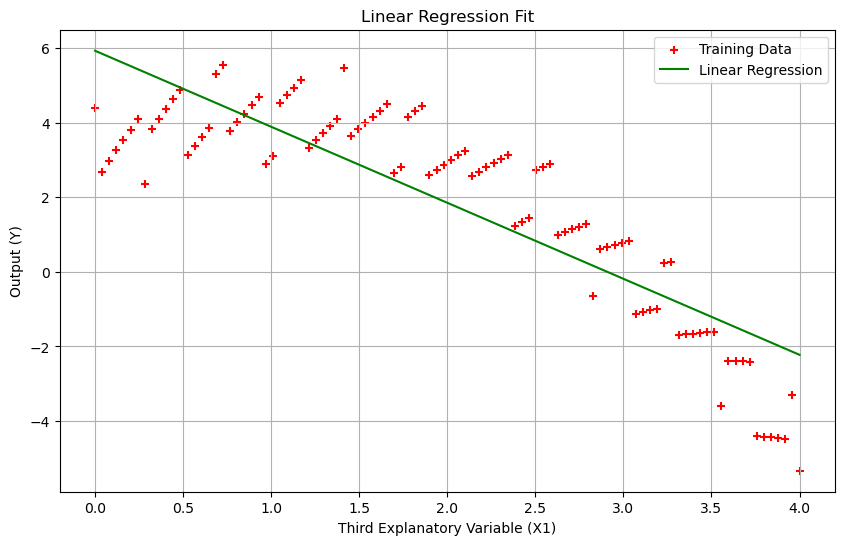

In [16]:
# From X1 lets take values of column of index 1 only
plt.scatter(X1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X1[:,1],X1.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Third Explanatory Variable (X1)')
plt.ylabel('Output (Y)')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of Gradient Descent')

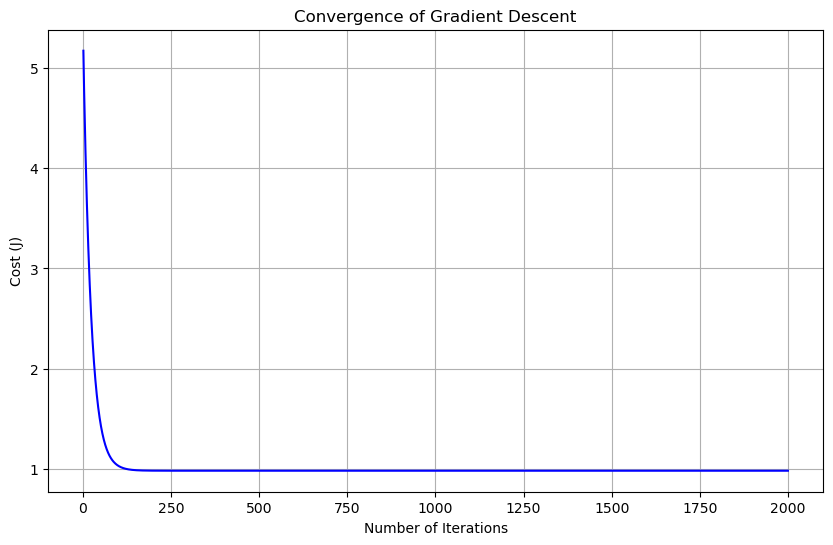

In [17]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

In [18]:
# Computing final theta values and cost history for Variable X2

theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta_0 and theta_1 for Variable X2 =', theta)
print('cost_history of Variable X2 =', cost_history)

Final value of theta_0 and theta_1 for Variable X2 = [0.73606043 0.55760761]
cost_history of Variable X2 = [7.26987578 7.00288482 6.83790041 ... 3.59936602 3.59936602 3.59936602]


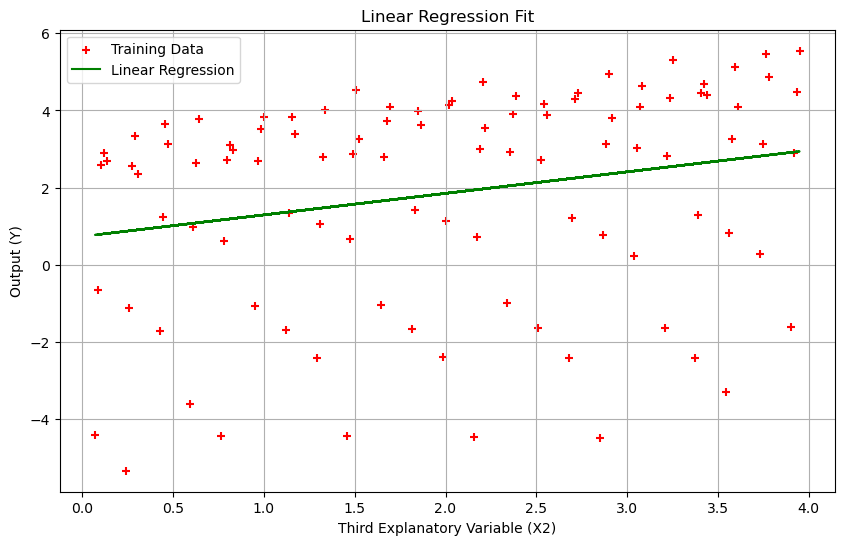

In [19]:
# From X2 lets take values of column of index 1 only
plt.scatter(X2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X2[:,1],X2.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Third Explanatory Variable (X2)')
plt.ylabel('Output (Y)')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of Gradient Descent')

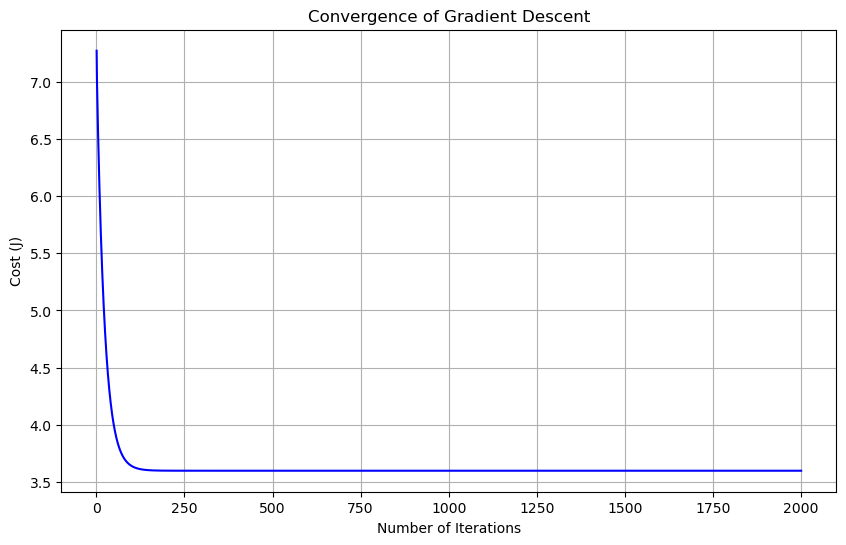

In [20]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

In [21]:
# Computing final theta values and cost history for Variable X3

theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta_0 and theta_1 for Variable X3 =', theta)
print('cost_history of Variable X3 =', cost_history)

Final value of theta_0 and theta_1 for Variable X3 = [ 2.8714221  -0.52048288]
cost_history of Variable X3 = [4.26200819 4.21568729 4.18664662 ... 3.62945112 3.62945112 3.62945112]


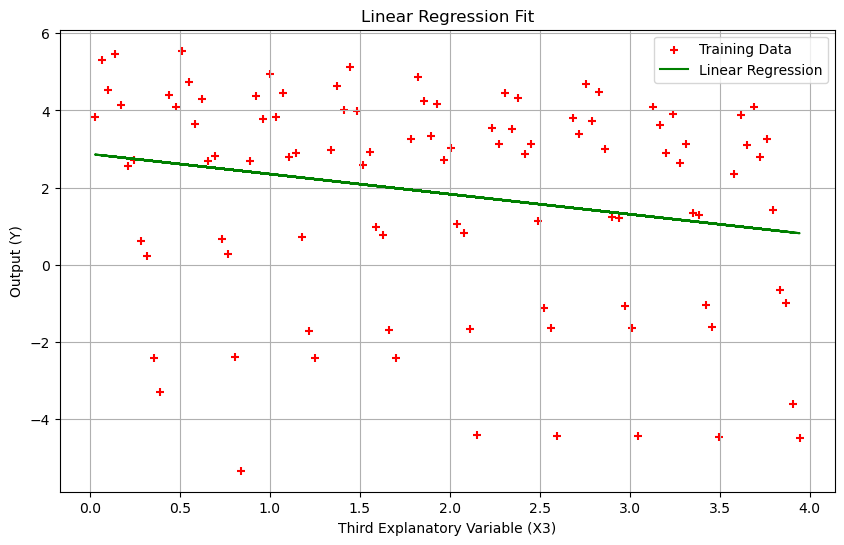

In [22]:
# From X3 lets take values of column of index 1 only
plt.scatter(X3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X3[:,1],X3.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Third Explanatory Variable (X3)')
plt.ylabel('Output (Y)')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of Gradient Descent')

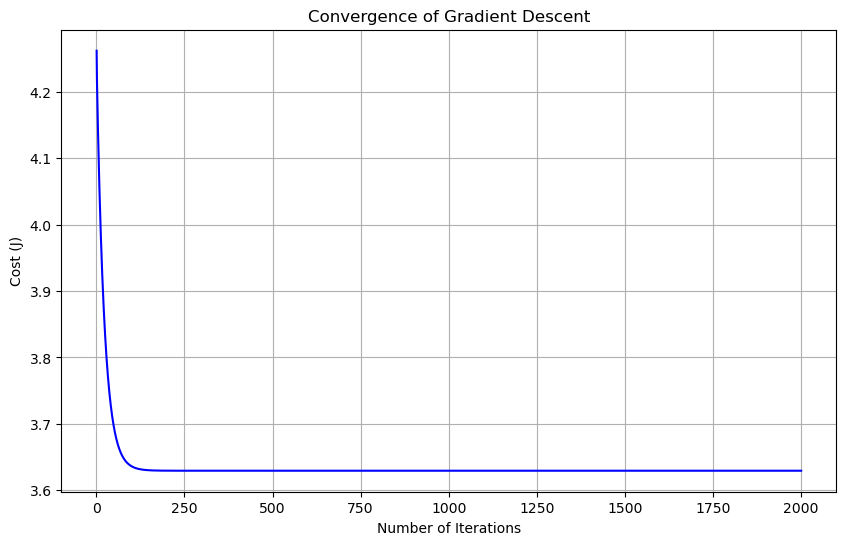

In [23]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')